This is the implementation of unsupervised learning using DBSCAN density-based clustering model for the traffic prediction dataset.

In [18]:
import pandas as pd

trafficData = pd.read_csv("C:\\Users\\User\\Downloads\\datasetAI\\TrafficTwoMonth.csv")

# after loading the data I am going to familiarize with the data
print("Calling the head() method on the traffic data:\n")
trafficData.head()

Calling the head() method on the traffic data:



,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


From this we see that data contains 9 columns.

In [19]:
# to obtain more information on data: 
print("Printing the data information:\n")
print(trafficData.info())


Printing the data information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB
None


From data.info we obtain that the traffic data contains 9 columns and 5952 records. All cells contain non-null values.

In [20]:
# to obtain even further information I will be using the describe() method for traffic data

print("Printing the data description:\n")
print(trafficData.describe())

Printing the data description:

              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  5952.000000  5952.000000  5952.000000  5952.000000  5952.000000   
mean     16.000000    65.440692    12.161458    12.912970    18.646337   
std       8.945023    44.749335    11.537944    12.497736    10.973139   
min       1.000000     5.000000     0.000000     0.000000     0.000000   
25%       8.000000    18.750000     3.000000     2.000000    10.000000   
50%      16.000000    62.000000     9.000000    10.000000    18.000000   
75%      24.000000   103.000000    19.000000    20.000000    27.000000   
max      31.000000   180.000000    70.000000    50.000000    60.000000   

             Total  
count  5952.000000  
mean    109.161458  
std      55.996312  
min      21.000000  
25%      54.000000  
50%     104.000000  
75%     153.000000  
max     279.000000  


Text(0, 0.5, 'Total nr of vehicles')

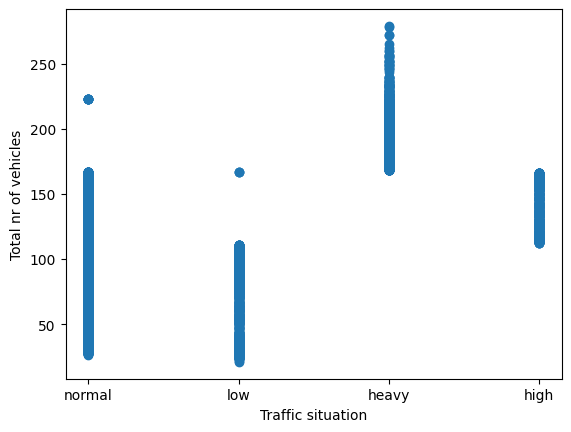

In [21]:
# next I am visualizing the data to obtain a deeper understanding of it and possibly detecting any patterns

from matplotlib import pyplot as plt

plt.scatter(trafficData.iloc[:,-1],trafficData.iloc[:,-2])
plt.xlabel("Traffic situation")
plt.ylabel("Total nr of vehicles")

In [22]:
# in order for the time column to be more meaningful I am going to convert it into hour, minute and am/pm
trafficData['Hour'] = pd.to_datetime(trafficData['Time']).dt.hour
trafficData['Minute'] = pd.to_datetime(trafficData['Time']).dt.minute

trafficData['AM/PM'] = trafficData['Time'].apply(lambda x:x.split(' ')[1])
trafficData['AM/PM'] = trafficData['AM/PM'].replace({"AM":0,"PM":1})


trafficData = trafficData.drop(columns=['Time'], axis=1)
trafficData.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13712\105624408.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trafficData['Hour'] = pd.to_datetime(trafficData['Time']).dt.hour
C:\Users\User\AppData\Local\Temp\ipykernel_13712\105624408.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trafficData['Minute'] = pd.to_datetime(trafficData['Time']).dt.minute


,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Minute,AM/PM
0,10,Tuesday,13,2,2,24,41,normal,0,0,0
1,10,Tuesday,14,1,1,36,52,normal,0,15,0
2,10,Tuesday,10,2,2,32,46,normal,0,30,0
3,10,Tuesday,10,2,2,36,50,normal,0,45,0
4,10,Tuesday,11,2,1,34,48,normal,1,0,0


In [23]:
# in order to work with numbers now I will be replacing the days of the week with their corresponding order numbers
trafficData['Day of the week'] = trafficData['Day of the week'].replace({"Monday":1,
                                        "Tuesday":2,
                                        "Wednesday":3,
                                        "Thursday":4,
                                        "Friday":5,
                                        "Saturday":6,
                                        "Sunday":7})
trafficData.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Minute,AM/PM
0,10,2,13,2,2,24,41,normal,0,0,0
1,10,2,14,1,1,36,52,normal,0,15,0
2,10,2,10,2,2,32,46,normal,0,30,0
3,10,2,10,2,2,36,50,normal,0,45,0
4,10,2,11,2,1,34,48,normal,1,0,0


In [24]:
# now converting the traffic situations into numbers

trafficData['Traffic Situation'] = trafficData['Traffic Situation'].replace({"low":0,
                                                                             "normal":1,
                                                                             "high":2,
                                                                             "heavy":3})
trafficData.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Minute,AM/PM
0,10,2,13,2,2,24,41,1,0,0,0
1,10,2,14,1,1,36,52,1,0,15,0
2,10,2,10,2,2,32,46,1,0,30,0
3,10,2,10,2,2,36,50,1,0,45,0
4,10,2,11,2,1,34,48,1,1,0,0


In [25]:
# Target situation is going to serve as a target column, that is what we are going to predict.
# Now I am extracting only the feature columns

features = pd.concat( [trafficData.iloc[:,:7], trafficData.iloc[:,8:]], axis=1)

Text(0, 0.5, 'Principal Component 2')

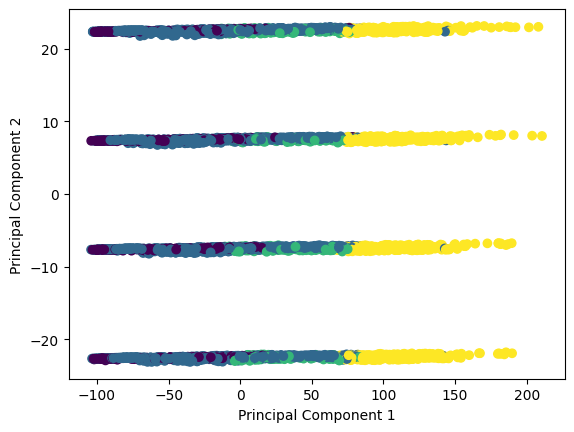

In [26]:
# now visualizing the data after applying dimensionality reduction to it

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(features)
pca_2d = pca.transform(features)

plt.scatter(pca_2d[:,0], pca_2d[:,1],c = trafficData['Traffic Situation'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Next step is data normalization. I will be applying a couple of normalization techniques(MinMax and Standard scaler), and fit each of the normalized data to the model, to determine which normalization technique worked best with our data.

In [27]:
from sklearn import preprocessing
# normalizing using minimax

scaler = preprocessing.MinMaxScaler()
s = scaler.fit_transform(features)

features_first_normalization = pd.DataFrame(s, columns=features.columns)
features_first_normalization

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Hour,Minute,AM/PM
0,0.300000,0.166667,0.045714,0.028571,0.04,0.400000,0.077519,0.000000,0.000000,0.0
1,0.300000,0.166667,0.051429,0.014286,0.02,0.600000,0.120155,0.000000,0.333333,0.0
2,0.300000,0.166667,0.028571,0.028571,0.04,0.533333,0.096899,0.000000,0.666667,0.0
3,0.300000,0.166667,0.028571,0.028571,0.04,0.600000,0.112403,0.000000,1.000000,0.0
4,0.300000,0.166667,0.034286,0.028571,0.02,0.566667,0.104651,0.043478,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
5947,0.266667,0.500000,0.062857,0.042857,0.02,0.600000,0.135659,0.956522,1.000000,1.0
5948,0.266667,0.500000,0.034286,0.000000,0.02,0.500000,0.081395,1.000000,0.000000,1.0
5949,0.266667,0.500000,0.057143,0.057143,0.02,0.416667,0.093023,1.000000,0.333333,1.0
5950,0.266667,0.500000,0.062857,0.071429,0.00,0.450000,0.104651,1.000000,0.666667,1.0


In [28]:
# normalizing using z-score (standard scaler)

scaler = preprocessing.StandardScaler()
s = scaler.fit_transform(features)

features_second_normalization = pd.DataFrame(s, columns=features.columns)
features_second_normalization

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Hour,Minute,AM/PM
0,-0.670820,-0.980884,-1.171975,-0.880773,-0.873269,0.487929,-1.217351,-1.661325,-1.341641,-1.0
1,-0.670820,-0.980884,-1.149626,-0.967451,-0.953290,1.581600,-1.020893,-1.661325,-0.447214,-1.0
2,-0.670820,-0.980884,-1.239021,-0.880773,-0.873269,1.217043,-1.128052,-1.661325,0.447214,-1.0
3,-0.670820,-0.980884,-1.239021,-0.880773,-0.873269,1.581600,-1.056613,-1.661325,1.341641,-1.0
4,-0.670820,-0.980884,-1.216672,-0.880773,-0.953290,1.399322,-1.092333,-1.516862,-1.341641,-1.0
...,...,...,...,...,...,...,...,...,...,...
5947,-0.782624,0.049875,-1.104929,-0.794095,-0.953290,1.581600,-0.949454,1.516862,1.341641,1.0
5948,-0.782624,0.049875,-1.216672,-1.054129,-0.953290,1.034765,-1.199492,1.661325,-1.341641,1.0
5949,-0.782624,0.049875,-1.127278,-0.707418,-0.953290,0.579068,-1.145912,1.661325,-0.447214,1.0
5950,-0.782624,0.049875,-1.104929,-0.620740,-1.033312,0.761347,-1.092333,1.661325,0.447214,1.0


After normalizing the data I will apply DBSCAN clustering to each of the normalized data and to the original data to compare the results.

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

model = DBSCAN(min_samples=5, eps=0.5)

labels = model.fit_predict(features_first_normalization)

silhouette = silhouette_score(features_first_normalization, labels)
print(f"Silhouette for min_samples=5, eps = 0.5: {silhouette}")

NameError: name 'features' is not defined

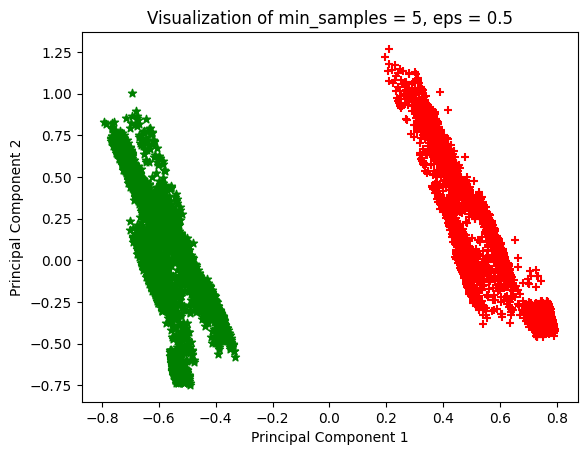

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(features_first_normalization)
pca_2d = pca.transform(features_first_normalization)

#Visualizing Clusters
for i in range(0, pca_2d.shape[0]):
  if labels[i] == 0:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='r', marker = '+')
  elif labels[i] == 1:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='g', marker = '*')
  elif labels[i] == 2:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='b', marker = '^')
  else:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='y', marker = 's')
 

plt.title("Visualization of min_samples = 5, eps = 0.5")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Silhouette for min_samples = 5, eps=1: 0.33225010429988244


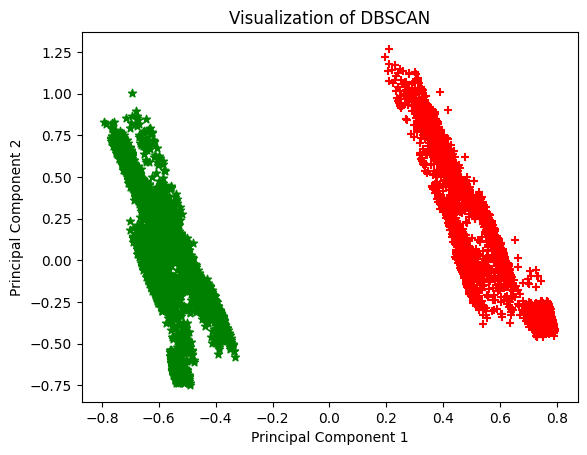

In [73]:
model = DBSCAN(min_samples=5, eps=1)
labels = model.fit_predict(features_first_normalization)

silhouette = silhouette_score(features_first_normalization, labels)
print(f"Silhouette for min_samples = 5, eps=1: {silhouette}")


#Visualizing Clusters
for i in range(0, pca_2d.shape[0]):
  if labels[i] == 0:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='r', marker = '+')
  elif labels[i] == 1:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='g', marker = '*')
  elif labels[i] == 2:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='b', marker = '^')
  else:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='y', marker = 's')
 

plt.title("Visualization of min_samples= 5, eps = 1")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Silhouette for min_samples = 5, eps=0.1: -0.27446428746970425


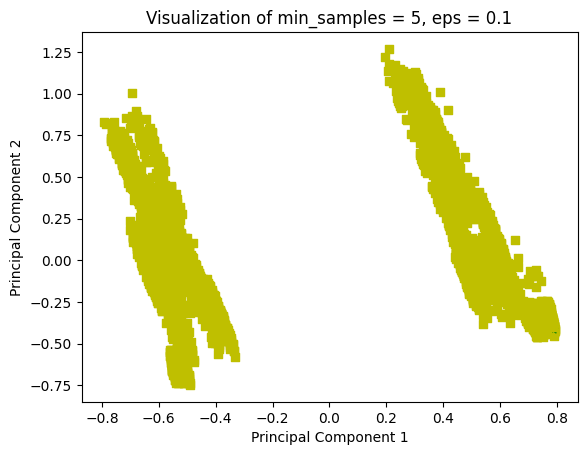

In [74]:
model = DBSCAN(min_samples=5, eps=0.1)
labels = model.fit_predict(features_first_normalization)


silhouette = silhouette_score(features_first_normalization, labels)
print(f"Silhouette for min_samples = 5, eps=0.1: {silhouette}")

#Visualizing Clusters
for i in range(0, pca_2d.shape[0]):
  if labels[i] == 0:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='r', marker = '+')
  elif labels[i] == 1:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='g', marker = '*')
  elif labels[i] == 2:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='b', marker = '^')
  else:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='y', marker = 's')
 

plt.title("Visualization of min_samples = 5, eps = 0.1")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Silhouette: -0.18703191545499628


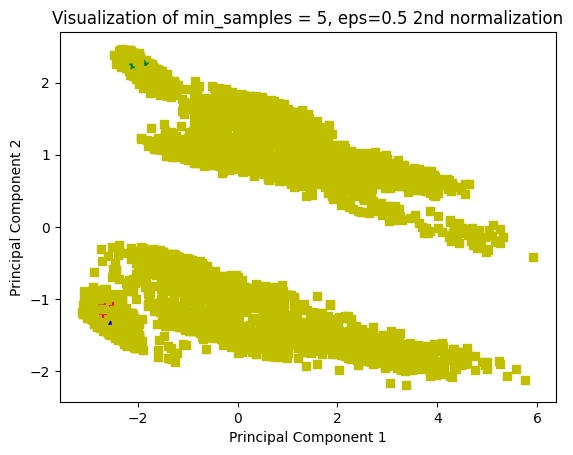

In [75]:
# DBSCAN on second normalized data

model = DBSCAN(min_samples=5, eps=0.5)

labels = model.fit_predict(features_second_normalization)


pca = PCA(n_components=2).fit(features_second_normalization)
pca_2d = pca.transform(features_second_normalization)

silhouette = silhouette_score(features_second_normalization, labels)
print(f"Silhouette: {silhouette}")


#Visualizing Clusters
for i in range(0, pca_2d.shape[0]):
  if labels[i] == 0:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='r', marker = '+')
  elif labels[i] == 1:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='g', marker = '*')
  elif labels[i] == 2:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='b', marker = '^')
  else:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='y', marker = 's')
 

plt.title("Visualization of min_samples = 5, eps=0.5 2nd normalization")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Silhouette: -0.31723903001876436


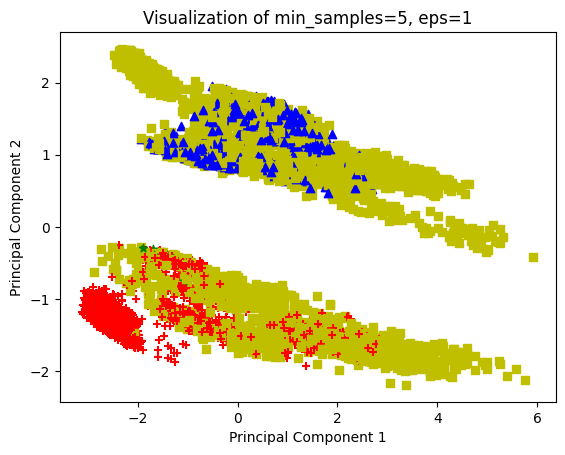

In [76]:
model = DBSCAN(min_samples=5, eps=1)

labels = model.fit_predict(features_second_normalization)

silhouette = silhouette_score(features_second_normalization, labels)
print(f"Silhouette: {silhouette}")

for i in range(0, pca_2d.shape[0]):
  if labels[i] == 0:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='r', marker = '+')
  elif labels[i] == 1:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='g', marker = '*')
  elif labels[i] == 2:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='b', marker = '^')
  else:
    plt.scatter(pca_2d[i,0],pca_2d[i,1], c='y', marker = 's')
 

plt.title("Visualization of min_samples=5, eps=1")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
